# Lending Club- Case Study
# Submitted by: Chandana Kalyan & Sri Krishna Hari

In [987]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [988]:
#importing dataset
loan_data_df = pd.read_csv("loan.csv")

/var/folders/ld/knz66s750qgb_2by_6ff63sm0000gp/T/ipykernel_4916/606419370.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_df = pd.read_csv("loan.csv")


In [989]:
#previewing dataset
loan_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [990]:
loan_data_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.00,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.00,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.00,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [991]:
loan_data_df.shape

(39717, 111)

In [992]:
loan_data_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Since we are analyzing defaulters' data, let's remove records that are currently paying loan

In [994]:
loan_data_df_updated= loan_data_df[loan_data_df['loan_status']!='Current']

In [995]:
loan_data_df_updated.shape

(38577, 111)

# REMOVING columns which mostly have null values

In [997]:
loan_data_df_updated.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

In [998]:
#REMOVING columns which mostly have null values
loan_data_nonull= loan_data_df_updated.dropna(axis=1, how='all')

In [999]:
loan_data_nonull.shape

(38577, 56)

In [1000]:
#removing more columns like IDs, Urls, description, title as they won't be useful in analysis

In [1001]:
#loan_data_nonull.drop([ 'url','desc','title'],axis=1,inplace=True)

In [1002]:
loan_data_nonull.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='o

In [1003]:
loan_data_nonull.shape

(38577, 56)

In [1004]:
#after scanning the data set we found some more variables which are details of approved loans and wont help in analysis

loan_data_nonull=loan_data_nonull.drop(['last_pymnt_d', 'last_pymnt_amnt','delinq_2yrs','earliest_cr_line','last_pymnt_amnt','inq_last_6mths','open_acc',
       'pub_rec', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','application_type', 'last_credit_pull_d'], axis=1)

In [1005]:
loan_data_nonull.shape

(38577, 40)

In [1006]:
loan_data_nonull.nunique().sort_values()

tax_liens                         1
out_prncp_inv                     1
out_prncp                         1
initial_list_status               1
acc_now_delinq                    1
collections_12_mths_ex_med        1
chargeoff_within_12_mths          1
pymnt_plan                        1
policy_code                       1
delinq_amnt                       1
term                              2
loan_status                       2
pub_rec_bankruptcies              3
verification_status               3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                 

In [1007]:
more_columns_todrop=['tax_liens','initial_list_status','out_prncp','collections_12_mths_ex_med','policy_code','out_prncp_inv','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pymnt_plan']

In [1008]:
loan_data_nonull= loan_data_nonull.drop(columns=more_columns_todrop,axis=1)

In [1009]:
loan_data_nonull.shape

(38577, 30)

In [1010]:
loan_data_nonull.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'mths_since_last_delinq', 'mths_since_last_record',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [1011]:
# Dropping columns with 90% or more null values
drop_limit = 0.9 * len(loan_data_nonull)

loan_data_drop90 = loan_data_nonull.loc[:, loan_data_nonull.isnull().sum() < drop_limit]

In [1012]:
loan_data_drop90.shape

(38577, 29)

In [1013]:
loan_data_drop90.dtypes

id                          int64
member_id                   int64
loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                   object
installment               float64
grade                      object
sub_grade                  object
emp_title                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
url                        object
desc                       object
purpose                    object
title                      object
zip_code                   object
addr_state                 object
dti                       float64
mths_since_last_delinq    float64
revol_bal                   int64
revol_util                 object
total_acc                   int64
pub_rec_bankruptcies      float64
dtype: object

In [1014]:
#Need to remove special characters 
loan_data_drop90['int_rate']= loan_data_drop90['int_rate'].str.replace('%', '').astype(float)

/var/folders/ld/knz66s750qgb_2by_6ff63sm0000gp/T/ipykernel_4916/382835572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_drop90['int_rate']= loan_data_drop90['int_rate'].str.replace('%', '').astype(float)


In [1015]:
loan_data_drop90.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38577 non-null  int64  
 1   member_id               38577 non-null  int64  
 2   loan_amnt               38577 non-null  int64  
 3   funded_amnt             38577 non-null  int64  
 4   funded_amnt_inv         38577 non-null  float64
 5   term                    38577 non-null  object 
 6   int_rate                38577 non-null  float64
 7   installment             38577 non-null  float64
 8   grade                   38577 non-null  object 
 9   sub_grade               38577 non-null  object 
 10  emp_title               36191 non-null  object 
 11  emp_length              37544 non-null  object 
 12  home_ownership          38577 non-null  object 
 13  annual_inc              38577 non-null  float64
 14  verification_status     38577 non-null  obj

In [1016]:
#Need to remove special characters 
loan_data_drop90['revol_util']= loan_data_drop90['revol_util'].str.replace('%', '').astype(float)

/var/folders/ld/knz66s750qgb_2by_6ff63sm0000gp/T/ipykernel_4916/1439770240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_drop90['revol_util']= loan_data_drop90['revol_util'].str.replace('%', '').astype(float)


In [1017]:
loan_data_drop90.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38577 non-null  int64  
 1   member_id               38577 non-null  int64  
 2   loan_amnt               38577 non-null  int64  
 3   funded_amnt             38577 non-null  int64  
 4   funded_amnt_inv         38577 non-null  float64
 5   term                    38577 non-null  object 
 6   int_rate                38577 non-null  float64
 7   installment             38577 non-null  float64
 8   grade                   38577 non-null  object 
 9   sub_grade               38577 non-null  object 
 10  emp_title               36191 non-null  object 
 11  emp_length              37544 non-null  object 
 12  home_ownership          38577 non-null  object 
 13  annual_inc              38577 non-null  float64
 14  verification_status     38577 non-null  obj

In [1018]:
#Need to remove string values from numeric columns
loan_data_drop90['term']= loan_data_drop90['term'].str.replace('months', '').astype(float)

/var/folders/ld/knz66s750qgb_2by_6ff63sm0000gp/T/ipykernel_4916/1935932074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_drop90['term']= loan_data_drop90['term'].str.replace('months', '').astype(float)


In [1019]:
loan_data_drop90.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38577 non-null  int64  
 1   member_id               38577 non-null  int64  
 2   loan_amnt               38577 non-null  int64  
 3   funded_amnt             38577 non-null  int64  
 4   funded_amnt_inv         38577 non-null  float64
 5   term                    38577 non-null  float64
 6   int_rate                38577 non-null  float64
 7   installment             38577 non-null  float64
 8   grade                   38577 non-null  object 
 9   sub_grade               38577 non-null  object 
 10  emp_title               36191 non-null  object 
 11  emp_length              37544 non-null  object 
 12  home_ownership          38577 non-null  object 
 13  annual_inc              38577 non-null  float64
 14  verification_status     38577 non-null  obj

In [1020]:
loan_data_drop90.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36.00,10.65,162.87,B,B2,...,credit_card,Computer,860xx,AZ,27.65,NaN,13648,83.70,9,0.00
1,1077430,1314167,2500,2500,2500.00,60.00,15.27,59.83,C,C4,...,car,bike,309xx,GA,1.00,NaN,1687,9.40,4,0.00
2,1077175,1313524,2400,2400,2400.00,36.00,15.96,84.33,C,C5,...,small_business,real estate business,606xx,IL,8.72,NaN,2956,98.50,10,0.00
3,1076863,1277178,10000,10000,10000.00,36.00,13.49,339.31,C,C1,...,other,personel,917xx,CA,20.00,35.00,5598,21.00,37,0.00
5,1075269,1311441,5000,5000,5000.00,36.00,7.90,156.46,A,A4,...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,NaN,7963,28.30,12,0.00


In [1021]:
# 'mths_since_last_delinq column' is mostly NA values so no point imputing values. Hence dropping column
loan_data_drop90= loan_data_drop90.drop('mths_since_last_delinq',axis=1)

In [1022]:
loan_data_drop90.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   member_id             38577 non-null  int64  
 2   loan_amnt             38577 non-null  int64  
 3   funded_amnt           38577 non-null  int64  
 4   funded_amnt_inv       38577 non-null  float64
 5   term                  38577 non-null  float64
 6   int_rate              38577 non-null  float64
 7   installment           38577 non-null  float64
 8   grade                 38577 non-null  object 
 9   sub_grade             38577 non-null  object 
 10  emp_title             36191 non-null  object 
 11  emp_length            37544 non-null  object 
 12  home_ownership        38577 non-null  object 
 13  annual_inc            38577 non-null  float64
 14  verification_status   38577 non-null  object 
 15  issue_d               38

In [1023]:
#imputing 'revol_util' column with median though we may or may not use it
loan_data_drop90['revol_util'].median()

49.1

In [1024]:
loan_data_drop90['revol_util']=loan_data_drop90['revol_util'].fillna(loan_data_drop90['revol_util'].median())

In [1025]:
loan_data_drop90.info()
#two columns still have null values and we can drop them if they are less than 5% as the usual safe limit

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   member_id             38577 non-null  int64  
 2   loan_amnt             38577 non-null  int64  
 3   funded_amnt           38577 non-null  int64  
 4   funded_amnt_inv       38577 non-null  float64
 5   term                  38577 non-null  float64
 6   int_rate              38577 non-null  float64
 7   installment           38577 non-null  float64
 8   grade                 38577 non-null  object 
 9   sub_grade             38577 non-null  object 
 10  emp_title             36191 non-null  object 
 11  emp_length            37544 non-null  object 
 12  home_ownership        38577 non-null  object 
 13  annual_inc            38577 non-null  float64
 14  verification_status   38577 non-null  object 
 15  issue_d               38

outliers- boxplot
date column


In [1027]:
#checking if null records are less than 5%

In [1028]:
(1-loan_data_drop90['pub_rec_bankruptcies'].count()/len(loan_data_drop90.index))*100


1.806776058273063

In [1029]:
(1-loan_data_drop90['emp_length'].count()/len(loan_data_drop90.index))*100

2.6777613603960915

In [1030]:
# checking if dropping the null records will result in less than 5% overall drop
((len(loan_data_drop90)-len(loan_data_cleaned))/38577)*100


11.981232340513778

In [1031]:
#drop rows with null values - less than 5%
loan_data_cleaned = loan_data_drop90.dropna(subset=['pub_rec_bankruptcies', 'emp_length'])

In [1032]:
#changing issue_d column to proper datetime format
loan_data_drop90['issue_d'] = pd.to_datetime(loan_data_drop90['issue_d'], format='%b-%y')
loan_data_drop90['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [1033]:
loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36847 entries, 0 to 39680
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    36847 non-null  int64  
 1   member_id             36847 non-null  int64  
 2   loan_amnt             36847 non-null  int64  
 3   funded_amnt           36847 non-null  int64  
 4   funded_amnt_inv       36847 non-null  float64
 5   term                  36847 non-null  float64
 6   int_rate              36847 non-null  float64
 7   installment           36847 non-null  float64
 8   grade                 36847 non-null  object 
 9   sub_grade             36847 non-null  object 
 10  emp_title             35482 non-null  object 
 11  emp_length            36847 non-null  object 
 12  home_ownership        36847 non-null  object 
 13  annual_inc            36847 non-null  float64
 14  verification_status   36847 non-null  object 
 15  issue_d               36

In [1034]:
loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36847 entries, 0 to 39680
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    36847 non-null  int64  
 1   member_id             36847 non-null  int64  
 2   loan_amnt             36847 non-null  int64  
 3   funded_amnt           36847 non-null  int64  
 4   funded_amnt_inv       36847 non-null  float64
 5   term                  36847 non-null  float64
 6   int_rate              36847 non-null  float64
 7   installment           36847 non-null  float64
 8   grade                 36847 non-null  object 
 9   sub_grade             36847 non-null  object 
 10  emp_title             35482 non-null  object 
 11  emp_length            36847 non-null  object 
 12  home_ownership        36847 non-null  object 
 13  annual_inc            36847 non-null  float64
 14  verification_status   36847 non-null  object 
 15  issue_d               36

In [1035]:
#dropping employee title as it will not have any impact
loan_data_cleaned= loan_data_cleaned.drop('emp_title',axis=1)

In [1036]:
loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36847 entries, 0 to 39680
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    36847 non-null  int64  
 1   member_id             36847 non-null  int64  
 2   loan_amnt             36847 non-null  int64  
 3   funded_amnt           36847 non-null  int64  
 4   funded_amnt_inv       36847 non-null  float64
 5   term                  36847 non-null  float64
 6   int_rate              36847 non-null  float64
 7   installment           36847 non-null  float64
 8   grade                 36847 non-null  object 
 9   sub_grade             36847 non-null  object 
 10  emp_length            36847 non-null  object 
 11  home_ownership        36847 non-null  object 
 12  annual_inc            36847 non-null  float64
 13  verification_status   36847 non-null  object 
 14  issue_d               36847 non-null  object 
 15  loan_status           36

In [1037]:
#also need to convert emp_length column to int
loan_data_cleaned['emp_length']= loan_data_cleaned['emp_length'].str.replace('>', '')
loan_data_cleaned['emp_length']= loan_data_cleaned['emp_length'].str.replace('+', '')
loan_data_cleaned['emp_length']= loan_data_cleaned['emp_length'].str.replace('<', '')
loan_data_cleaned['emp_length']= loan_data_cleaned['emp_length'].str.replace('years', '')
loan_data_cleaned['emp_length']= loan_data_cleaned['emp_length'].str.replace('year', '')
loan_data_cleaned['emp_length']= loan_data_cleaned['emp_length'].str.replace(' ', '')


In [1038]:
loan_data_cleaned['emp_length']=loan_data_cleaned['emp_length'].astype(int)
loan_data_cleaned['emp_length'].dtype

dtype('int64')

In [1039]:
#converting annual income column to float
loan_data_cleaned.annual_inc.astype(float)

0       24000.00
1       30000.00
2       12252.00
3       49200.00
5       36000.00
          ...   
39562   35000.00
39573   63500.00
39623   39000.00
39666   40000.00
39680   36153.00
Name: annual_inc, Length: 36847, dtype: float64

# starting to plot

{'whiskers': [<matplotlib.lines.Line2D at 0x5ce87f920>,
 'caps': [<matplotlib.lines.Line2D at 0x5ce87de80>,
 'boxes': [<matplotlib.lines.Line2D at 0x5ce87d730>],
 'medians': [<matplotlib.lines.Line2D at 0x14b6a8dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x5cb2d2090>],
 'means': []}

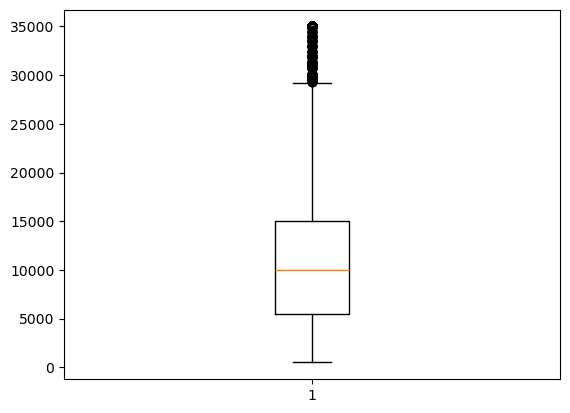

In [1041]:
#Distribution of loan amount

plt.boxplot(loan_data_cleaned.loan_amnt)


In [1042]:
loan_data_cleaned.loan_amnt.describe()

count   36847.00
mean    11141.33
std      7369.99
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

In [1043]:
#based on boxplot above, removing 'loan_amnt' outliers

Q1 = loan_data_cleaned['loan_amnt'].quantile(0.25)  # 25th percentile
Q3 = loan_data_cleaned['loan_amnt'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
loan_data_cleaned= loan_data_cleaned[(loan_data_cleaned['loan_amnt'] >= lower_fence) & (loan_data_cleaned['loan_amnt'] <= upper_fence)]
loan_data_cleaned.loan_amnt.describe()

count   35769.00
mean    10481.66
std      6396.52
min       500.00
25%      5200.00
50%      9500.00
75%     15000.00
max     29175.00
Name: loan_amnt, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x5ceb18350>,
 'caps': [<matplotlib.lines.Line2D at 0x5ceb1a5a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x5ceb18530>],
 'medians': [<matplotlib.lines.Line2D at 0x5ceb1a150>],
 'fliers': [<matplotlib.lines.Line2D at 0x5ceb19e80>],
 'means': []}

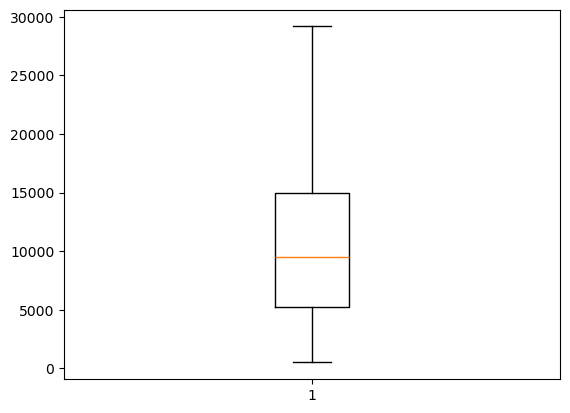

In [1044]:
#Distribution of loan amount after removing outliers
plt.boxplot(loan_data_cleaned['loan_amnt'])

Text(0.5, 1.0, 'Distribution of Charged off loans')

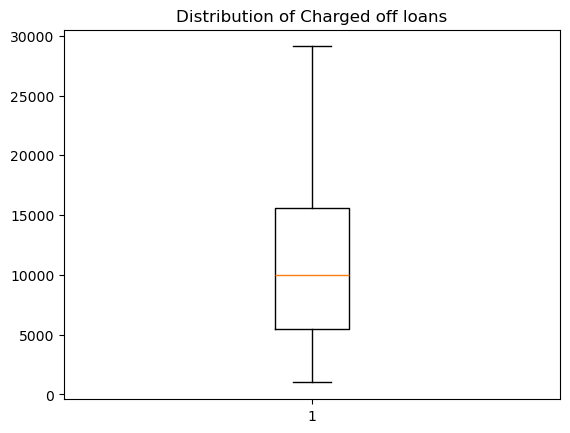

In [1045]:
#Distribution of Charged off loans
#creating a dataframe with Charged off records only

loan_data_chargedoff=loan_data_cleaned[loan_data_cleaned['loan_status']=="Charged Off"]

plt.boxplot(loan_data_chargedoff['loan_amnt'])
loan_data_chargedoff['loan_amnt'].describe()
plt.title('Distribution of Charged off loans')

Text(0.5, 1.0, 'Distribution of Fully Paid loans')

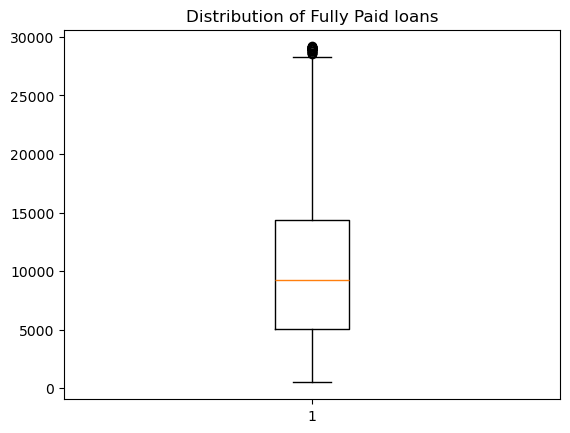

In [1046]:
#creating a dataframe with Fully paid records only
#Plotting Distribution of Fully Paid loans

loan_data_paid=loan_data_cleaned[loan_data_cleaned['loan_status']=="Fully Paid"]

plt.boxplot(loan_data_paid['loan_amnt'])
loan_data_paid['loan_amnt'].describe()
plt.title('Distribution of Fully Paid loans')

count   35769.00
mean       11.87
std         3.63
min         5.42
25%         8.94
50%        11.71
75%        14.27
max        24.40
Name: int_rate, dtype: float64

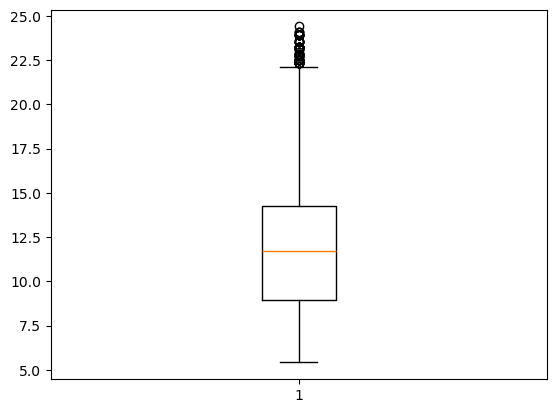

In [1047]:
#Distribution of interest rate

plt.boxplot(loan_data_cleaned.int_rate)
loan_data_cleaned.int_rate.describe()

In [1048]:
#removing 'int_rate' outliers

Q1 = loan_data_cleaned['int_rate'].quantile(0.25)  # 25th percentile
Q3 = loan_data_cleaned['int_rate'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
loan_data_cleaned= loan_data_cleaned[(loan_data_cleaned['int_rate'] >= lower_fence) & (loan_data_cleaned['int_rate'] <= upper_fence)]
loan_data_cleaned.int_rate.describe()


count   35703.00
mean       11.85
std         3.60
min         5.42
25%         8.94
50%        11.71
75%        14.27
max        22.11
Name: int_rate, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x5ce9941a0>,
 'caps': [<matplotlib.lines.Line2D at 0x5ce994740>,
 'boxes': [<matplotlib.lines.Line2D at 0x5cea641a0>],
 'medians': [<matplotlib.lines.Line2D at 0x5ce994c80>],
 'fliers': [<matplotlib.lines.Line2D at 0x5ce994fb0>],
 'means': []}

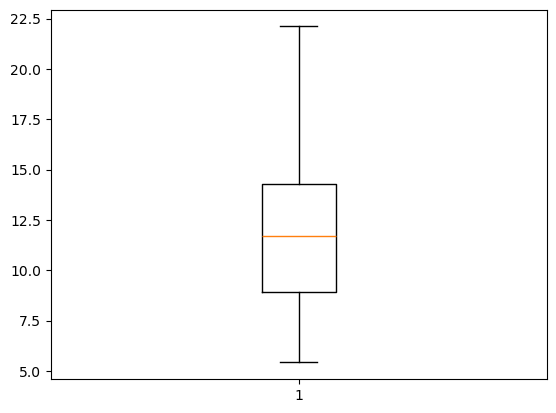

In [1049]:
#Distribution of int_rate after removing outliers

plt.boxplot(loan_data_cleaned['int_rate'])

In [1050]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

count     35703.00
mean      67671.15
std       62690.41
min        4000.00
25%       40200.00
50%       58000.00
75%       80000.00
max     6000000.00
Name: annual_inc, dtype: float64

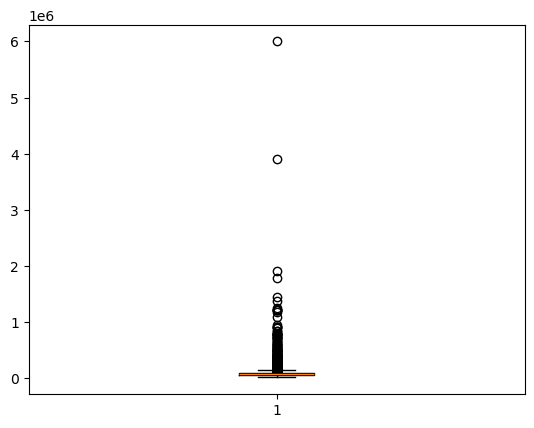

In [1051]:
#what is the distribution of annual income?

plt.boxplot(loan_data_cleaned.annual_inc)
loan_data_cleaned.annual_inc.describe()

{'whiskers': [<matplotlib.lines.Line2D at 0x5ce9d3860>,
 'caps': [<matplotlib.lines.Line2D at 0x5ce9d3e30>,
 'boxes': [<matplotlib.lines.Line2D at 0x5ce9d2780>],
 'medians': [<matplotlib.lines.Line2D at 0x5cea00470>],
 'fliers': [<matplotlib.lines.Line2D at 0x5cea00770>],
 'means': []}

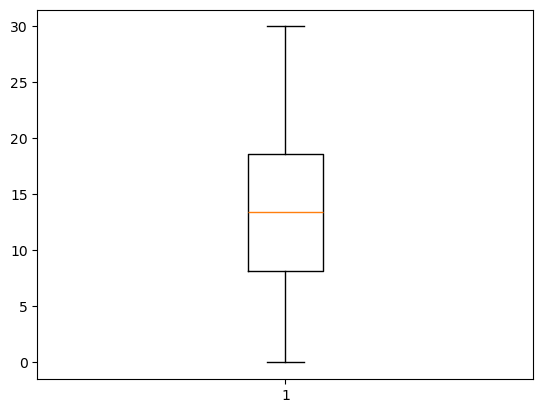

In [1052]:
#Distribution of DTI

plt.boxplot(loan_data_cleaned.dti)

In [1053]:
#looping to remove any further outliers

cols_outlier = ['annual_inc']  # List of numeric columns
for i in cols_outlier:
    Q1 = loan_data_cleaned[i].quantile(0.25)
    Q3 = loan_data_cleaned[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    loan_data_cleaned = loan_data_cleaned[(loan_data_cleaned[i] >= lower_fence) & (loan_data_cleaned[i] <= upper_fence)]

In [1054]:
loan_data_cleaned.annual_inc.describe()

count    33955.00
mean     60314.44
std      26826.58
min       4000.00
25%      40000.00
50%      55200.00
75%      76000.00
max     139500.00
Name: annual_inc, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x5cea01640>,
 'caps': [<matplotlib.lines.Line2D at 0x5cea9df10>,
 'boxes': [<matplotlib.lines.Line2D at 0x5ce9b2090>],
 'medians': [<matplotlib.lines.Line2D at 0x5cea9f440>],
 'fliers': [<matplotlib.lines.Line2D at 0x5cead6e70>],
 'means': []}

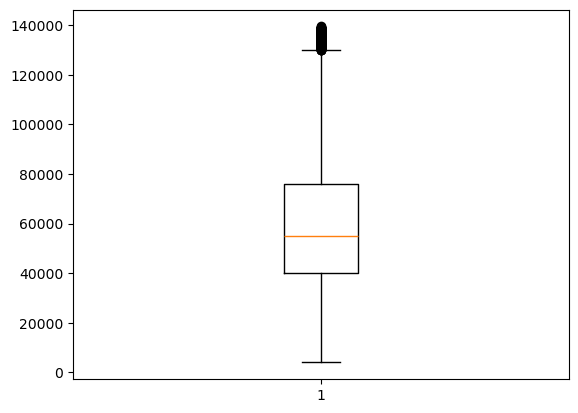

In [1055]:
#Distribution of Annual income

plt.boxplot(loan_data_cleaned.annual_inc)


Text(0.5, 1.0, 'Debt-to-Income distribution')

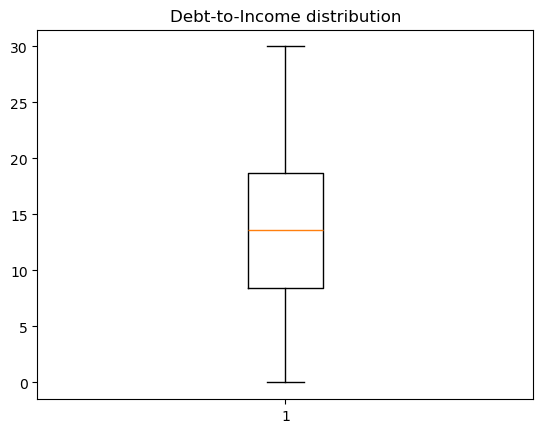

In [1056]:
#Distribution of Debt-to-income ratio, dti

plt.boxplot(loan_data_cleaned.dti)
plt.title('Debt-to-Income distribution')

Text(0.5, 1.0, 'Loans per term')

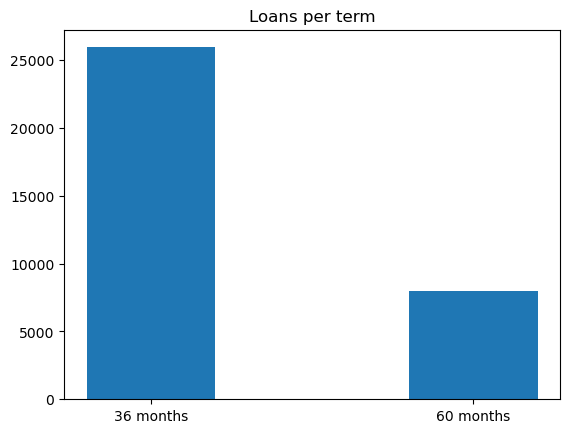

In [1057]:
#grouping term column to plot by term

group_term = loan_data_cleaned.groupby('term')['loan_amnt'].count()

plt.bar(['36 months','60 months'],group_term,width=0.4)
plt.title('Loans per term')

Text(0.5, 1.0, 'Frequency of Loans per grade')

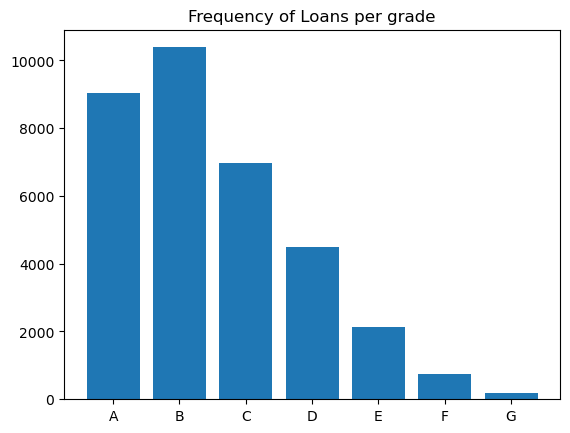

In [1058]:
# Plotting loan_amount vs grade

grades= loan_data_cleaned.groupby('grade')['loan_amnt'].count()
plt.bar(['A','B','C','D','E','F','G'],grades)
plt.title('Frequency of Loans per grade')

Text(0.5, 0, 'In years')

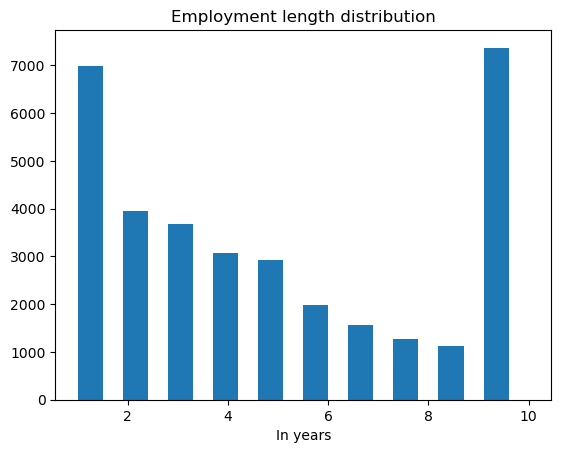

In [1059]:
#Plotting employee length distribution

plt.hist(loan_data_cleaned['emp_length'],bins=10,width=0.5)
plt.title('Employment length distribution')
plt.xlabel('In years')

Text(0.5, 0, '')

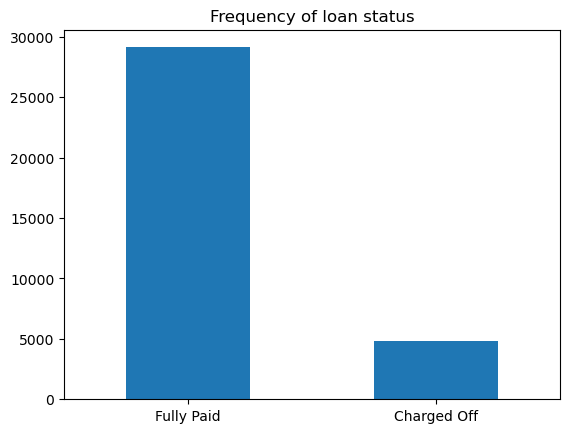

In [1060]:
# Frequency of loan statuses 

status_freq= loan_data_cleaned['loan_status'].value_counts()
status_freq.plot(kind='bar')
plt.title('Frequency of loan status')
plt.xticks(rotation=0)
plt.xlabel(None)

Text(0.5, 0, '')

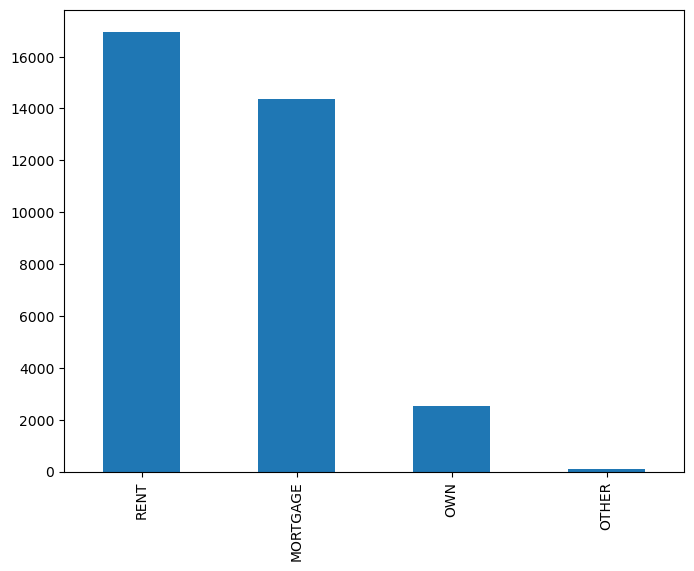

In [1061]:
#what kind of accomodation do most of our applicants live in?

plt.figure(figsize=(8, 6))
loan_data_cleaned['home_ownership'].value_counts().plot.bar()
plt.xlabel(None)


In [1062]:
new_loan_df=loan_data_cleaned.groupby('loan_status').count()
new_loan_df


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,desc,purpose,title,zip_code,addr_state,dti,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,4824,4824,4824,4824,4824,4824,4824,4824,4824,4824,...,3249,4824,4823,4824,4824,4824,4824,4824,4824,4824
Fully Paid,29131,29131,29131,29131,29131,29131,29131,29131,29131,29131,...,19627,29131,29122,29131,29131,29131,29131,29131,29131,29131


Text(0.5, 0, '')

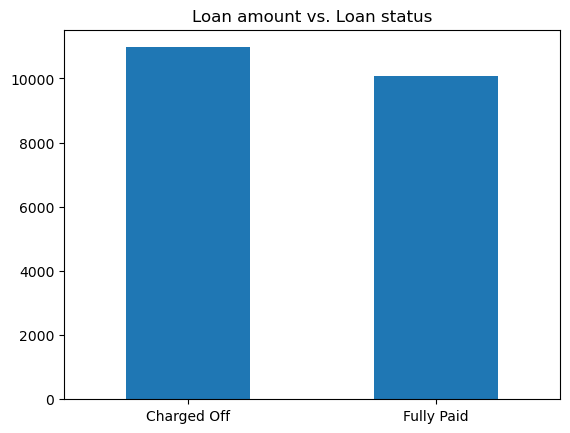

In [1063]:
#Loan amount vs Loan status

loan_amnt_avg= loan_data_cleaned.groupby('loan_status')['loan_amnt'].mean()
loan_amnt_avg.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Loan amount vs. Loan status')
plt.xlabel(None)

In [1064]:
#segmented univariate boxplot annual income

import seaborn as sns

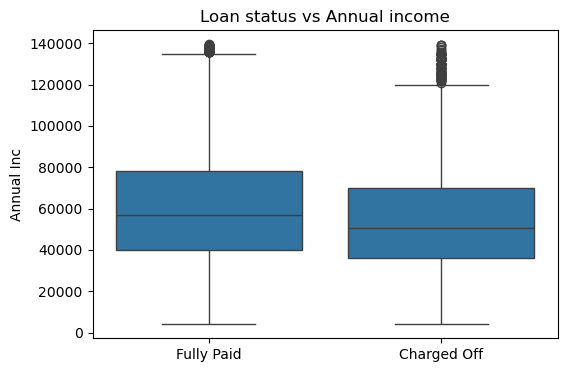

In [1065]:
#segmented univariate boxplot annual income

plt.figure(figsize=(6, 4))
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data_cleaned)
plt.title('Loan status vs Annual income')
plt.ylabel('Annual Inc')
plt.xlabel(None)
plt.show()

Text(0, 0.5, 'Loan Amount')

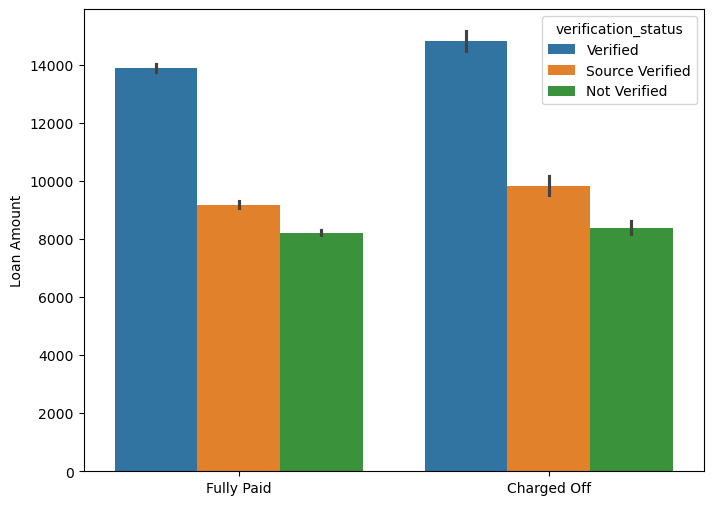

In [1066]:
#segmented analysis by verification status

plt.figure(figsize=(8, 6))
sns.barplot(data=loan_data_cleaned, x='loan_status', y='loan_amnt', hue='verification_status')
plt.xlabel(None)
plt.ylabel('Loan Amount')

Text(0, 0.5, 'Loan Amount')

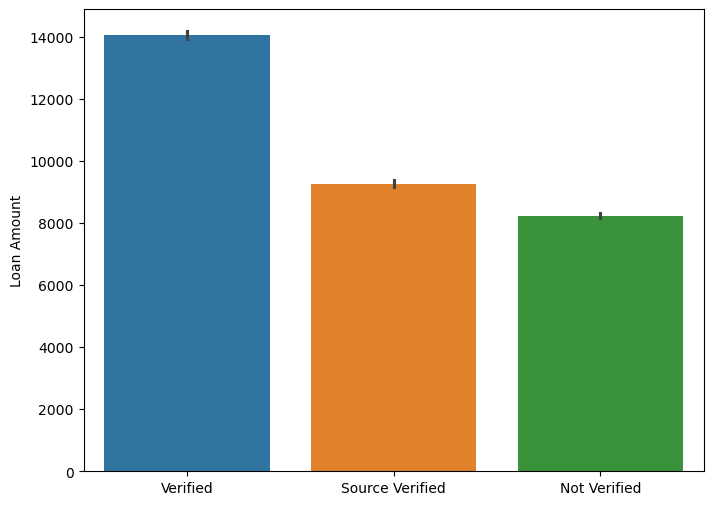

In [1067]:
# who gets higher loan amounts, verfied or unverified?

plt.figure(figsize=(8, 6))
sns.barplot(data=loan_data_cleaned, x='verification_status', y='loan_amnt',hue='verification_status')
plt.xlabel(None)
plt.ylabel('Loan Amount')

In [1068]:
#To plot loan amount vs annual income, creating income buckets

def bucket(annual_income):
    if annual_income <= 40000:
        return '0-40k'
    elif annual_income <= 80000:
        return '40-80k'
    elif annual_income <= 150000:
        return '80-150k'
    else:
        return 'above 150k'

loan_data_cleaned['Income groups']= loan_data_cleaned['annual_inc'].apply(bucket)

In [1069]:
loan_data_cleaned['Income groups']

0         0-40k
1         0-40k
2         0-40k
3        40-80k
5         0-40k
          ...  
39562     0-40k
39573    40-80k
39623     0-40k
39666     0-40k
39680     0-40k
Name: Income groups, Length: 33955, dtype: object

Text(0, 0.5, 'Loan Frequency')

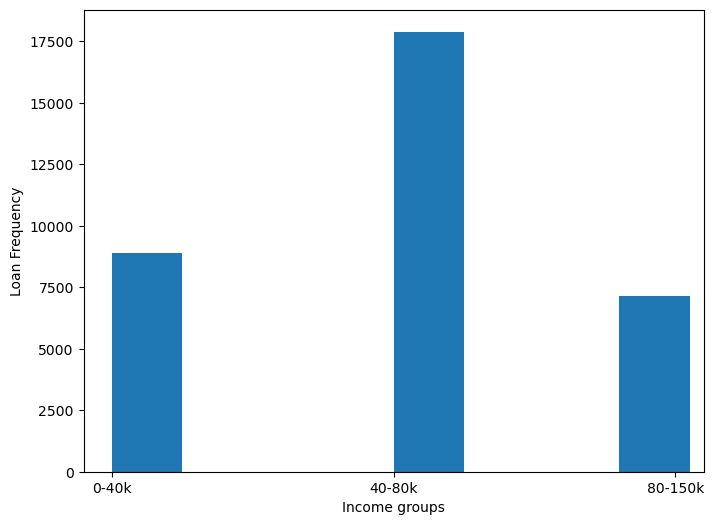

In [1070]:
#Plotting loans per income group

plt.figure(figsize=(8, 6))
plt.hist(loan_data_cleaned['Income groups'],width=0.25)
plt.xlabel('Income groups')
plt.ylabel('Loan Frequency')

In [1071]:
#creating year column from issue date 

loan_data_cleaned['year'] = loan_data_cleaned['issue_d'].dt.year



In [1072]:
#plotting top-10 charged off loans per state

state_wise_chargeoff=loan_data_chargedoff.groupby('addr_state')['loan_status'].count()
state_wise_chargeoff=pd.DataFrame(state_wise_chargeoff)
state_wise_chargeoff.reset_index()
top_10_statewise=state_wise_chargeoff[state_wise_chargeoff['loan_status']>100]


In [1073]:
top_10_statewise['addr_state'] = top_10_statewise.index
top_10_statewise = top_10_statewise.reset_index(drop=True)

/var/folders/ld/knz66s750qgb_2by_6ff63sm0000gp/T/ipykernel_4916/3611356427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_statewise['addr_state'] = top_10_statewise.index


In [1074]:
top_10_statewise 

,loan_status,addr_state
0,112,AZ
1,1002,CA
2,443,FL
3,192,GA
4,183,IL
5,143,MA
6,143,MD
7,103,MO
8,257,NJ
9,441,NY


Text(0.5, 0, 'Top 10 defaulting states')

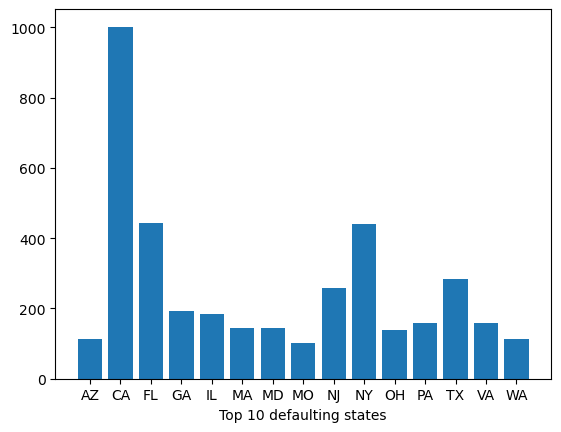

In [1075]:
#plotting top-10 charged off loans per state

plt.bar(top_10_statewise['addr_state'],top_10_statewise['loan_status'])
plt.xlabel('Top 10 defaulting states')

In [1076]:
#term vs. loan status

termwise_status= loan_data_chargedoff.groupby('term')['loan_status'].count()
termwise_status=pd.DataFrame(termwise_status)
termwise_status.reset_index()
termwise_status['term']=termwise_status.index


In [1077]:
termwise_status

,loan_status,term
term,,
36.00,2929,36.00
60.00,2105,60.00


Text(0, 0.5, 'Charged off count')

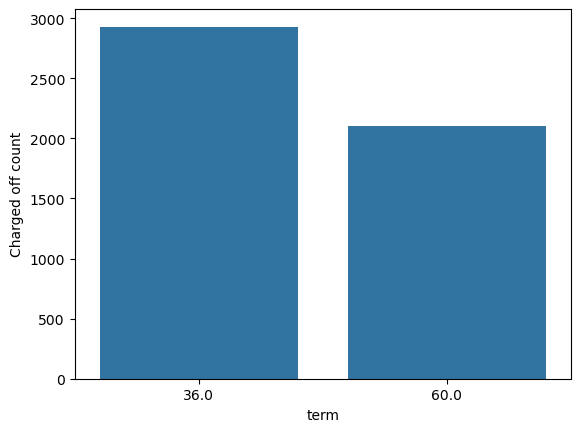

In [1078]:
sns.barplot(data=termwise_status, x='term', y='loan_status')
plt.ylabel('Charged off count')

Text(0.5, 0, '')

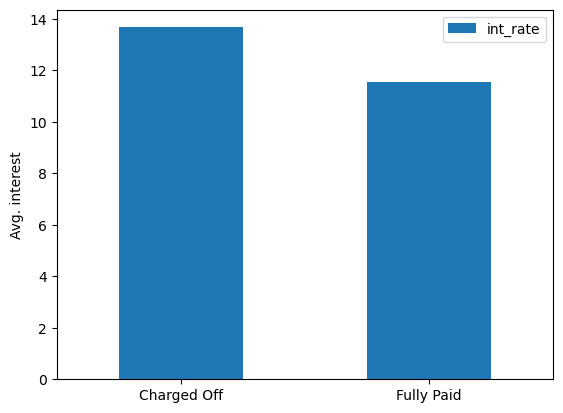

In [1079]:
#plotting average interest rate by loan status

avg_int_bystatus= loan_data_cleaned.groupby('loan_status')['int_rate'].mean() 
avg_int_bystatus=pd.DataFrame(avg_int_bystatus)
avg_int_bystatus
avg_int_bystatus.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Avg. interest')
plt.xlabel(None)

In [1080]:
#plotting charged off loans by grade

grade_vs_chargedoff= loan_data_chargedoff.groupby('grade')['loan_status'].count() 
grade_vs_chargedoff=pd.DataFrame(grade_vs_chargedoff)
grade_vs_chargedoff

,loan_status
grade,
A,549
B,1295
C,1218
D,1014
E,614
F,259
G,85


Text(0, 0.5, 'Charge off count')

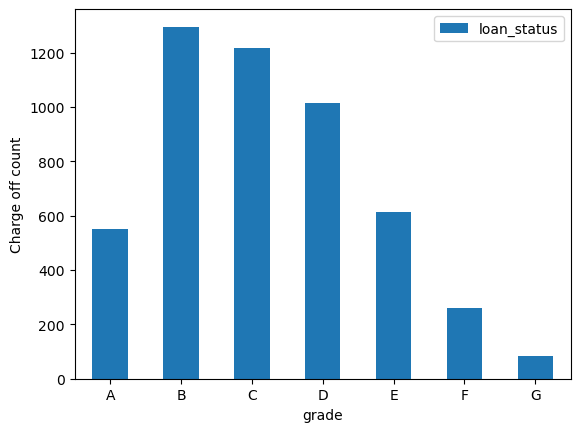

In [1081]:
#plotting charged off loans by grade

grade_vs_chargedoff.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Charge off count')

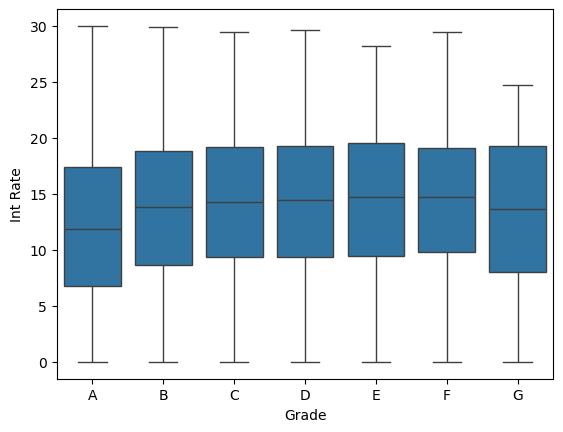

In [1082]:
#Segmented analysis of interest rate

grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.boxplot(data=loan_data_cleaned, x='grade', y='dti',order=grade_order)
plt.xlabel("Grade")
plt.ylabel("Int Rate")
plt.show()

In [1083]:
loan_data_cleaned.to_csv('loan_data_cleaned.csv', index=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'debt_consolidation'),
  Text(3, 0, 'educational'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'house'),
  Text(6, 0, 'major_purchase'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'moving'),
  Text(9, 0, 'other'),
  Text(10, 0, 'renewable_energy'),
  Text(11, 0, 'small_business'),
  Text(12, 0, 'vacation'),
  Text(13, 0, 'wedding')])

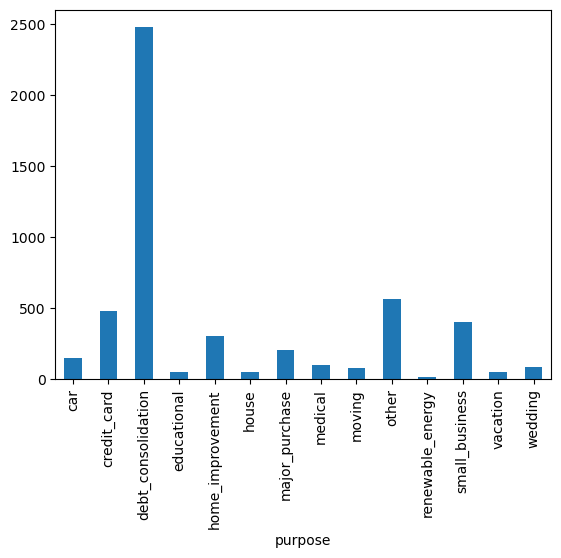

In [1084]:
#what was the main purposes of charged off loans?

purpose_chargedoff= loan_data_chargedoff.groupby('purpose')['loan_status'].count() 
purpose_chargedoff.plot(kind='bar')
plt.xticks(rotation=90) 